In [1]:
import numpy as np
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
m = pd.read_csv('m_full.csv')

In [20]:
mg = m[['year','series','id']].groupby(['year','series']).count()

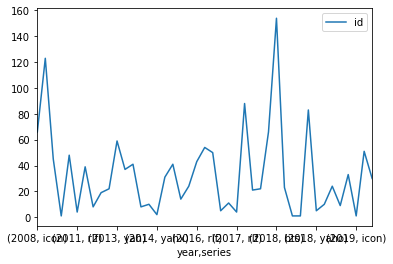

In [29]:
mg.plot()

In [30]:
mg=mg.reset_index()

In [36]:
mg.head()

,year,series,id
0,2008,icon,66
1,2009,icon,123
2,2010,icon,45
3,2010,rlf,1
4,2011,icon,48


In [37]:
mg['series'].value_counts()

icon     12
rlf       9
yah       7
yahx      4
yaho      4
bto       2
bts       2
yahox     2
btx       1
Name: series, dtype: int64

In [49]:
series = m.series.unique()

In [42]:
m.head()

,id,city,country,month,name,series,state,year,date,cun,location_type,location_path,latitude,longitude
0,aachen_icon,Aachen,Germany,January,Aachen,icon,NaN,2009,2009-01-01,Aachen,city,"Aachen, Germany",50.776351,6.083862
1,aarhus_icon,Aarhus,Denmark,January,Aarhus,icon,NaN,2014,2014-01-01,Arhus,city,"Aarhus, Denmark",56.149628,10.213405
2,aberdeen_yah,Aberdeen,United Kingdom,August,Aberdeen,yah,Scotland,2017,2017-08-01,Aberdeen,city,"Aberdeen, Scotland, United Kingdom",57.148243,-2.092809
3,abu_dhabi_icon,Abu Dhabi,United Arab Emirates,January,Abu Dhabi,icon,NaN,2011,2011-01-01,Abu Dhabi,city,"Abu Dhabi, United Arab Emirates",23.997644,53.643910
4,acapulco_bts,Acapulco,Mexico,August,Acapulco,bts,Guerrero,2018,2018-08-01,Acapulco de Juarez,city,"Acapulco, Guerrero, Mexico",16.868049,-99.894018


In [67]:
ms = m[['id','year','country','series']]

In [68]:
pd.get_dummies(ms.series)

,bto,bts,btx,icon,rlf,yah,yaho,yahox,yahx
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1426,0,0,0,0,0,1,0,0,0
1427,0,0,0,0,0,1,0,0,0
1428,0,0,0,1,0,0,0,0,0
1429,0,0,0,0,1,0,0,0,0


In [69]:
mc = pd.concat([ms, pd.get_dummies(ms.series)], axis=1)

In [70]:
mc.head()

,id,year,country,series,bto,bts,btx,icon,rlf,yah,yaho,yahox,yahx
0,aachen_icon,2009,Germany,icon,0,0,0,1,0,0,0,0,0
1,aarhus_icon,2014,Denmark,icon,0,0,0,1,0,0,0,0,0
2,aberdeen_yah,2017,United Kingdom,yah,0,0,0,0,0,1,0,0,0
3,abu_dhabi_icon,2011,United Arab Emirates,icon,0,0,0,1,0,0,0,0,0
4,acapulco_bts,2018,Mexico,bts,0,1,0,0,0,0,0,0,0


In [71]:
mc.groupby(['year','series']).count().head()

id  country  bto  bts  btx  icon  rlf  yah  yaho  yahox  yahx
year series                                                                
2008 icon     66       66   66   66   66    66   66   66    66     66    66
2009 icon    123      123  123  123  123   123  123  123   123    123   123
2010 icon     45       45   45   45   45    45   45   45    45     45    45
     rlf       1        1    1    1    1     1    1    1     1      1     1
2011 icon     48       48   48   48   48    48   48   48    48     48    48

In [72]:
mg = mc.groupby('year').sum()

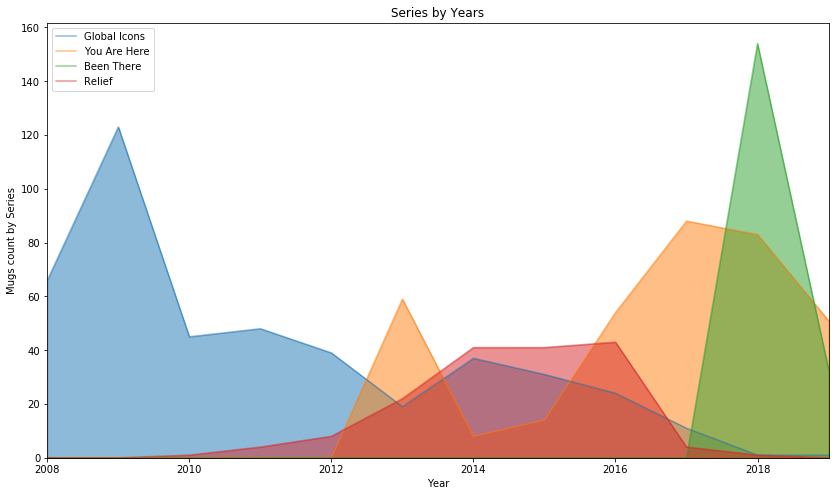

In [159]:
mg[['icon','yah','bts','rlf']].plot.area(figsize=(14,8), title='Series by Years', stacked=False)
plt.ylabel('Mugs count by Series')
plt.xlabel('Year')
plt.legend(['Global Icons', 'You Are Here', 'Been There', 'Relief'])
plt.show()

In [104]:
mgc = mc.drop('year', axis=1).groupby('country').sum()

In [105]:
mgc.head()

,bto,bts,btx,icon,rlf,yah,yaho,yahox,yahx
country,,,,,,,,,
Andorra,0,0,0,0,0,1,0,0,0
Argentina,0,5,0,3,0,0,0,0,0
Aruba,0,0,0,1,0,0,0,0,0
Australia,0,0,0,5,14,5,0,0,1
Austria,0,0,0,3,0,3,1,1,1


In [137]:
top_countries = set(mgc.groupby('country').sum().sort_values('bts', ascending=False).head(5).index.values)
top_countries.update(mgc.groupby('country').sum().sort_values('yah', ascending=False).head(5).index.values)
top_countries.update(mgc.groupby('country').sum().sort_values('icon', ascending=False).head(5).index.values)
len(top_countries)

9

In [140]:
mgc=mgc[mgc.index.isin(top_countries)]
mgc

,bto,bts,btx,icon,rlf,yah,yaho,yahox,yahx
country,,,,,,,,,
Argentina,0,5,0,3,0,0,0,0,0
Canada,4,23,1,11,0,14,4,0,0
China,0,0,0,58,47,76,1,0,4
Colombia,0,4,0,1,0,0,0,0,0
Germany,0,0,0,42,4,15,2,1,3
Mexico,0,26,0,30,0,0,0,0,0
Philippines,0,0,0,20,6,15,0,0,6
United Kingdom,0,0,0,16,4,14,2,1,4
United States,71,110,22,50,6,81,48,10,2


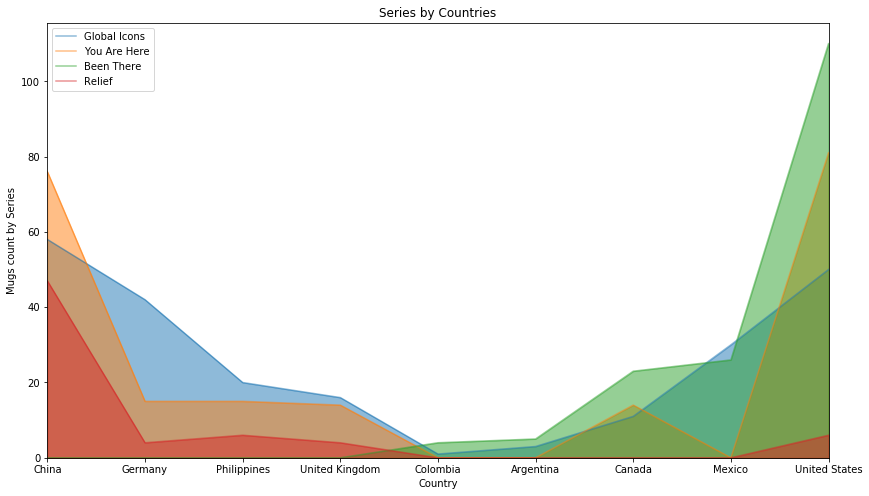

In [161]:
mgc[['icon','yah','bts','rlf']].sort_values('bts').plot.area(figsize=(14,8), title='Series by Countries', stacked=False)
plt.xlabel('Country')
plt.ylabel('Mugs count by Series')
plt.legend(['Global Icons', 'You Are Here', 'Been There', 'Relief'])
plt.show()